*Eddie Jakubauskas*

*Date: 2-27-2024 (Start Time)*

*Chicago Crime Data Analysis Project*

# Data Aquisition and Intent

***Overview***:

>Throughout this project I will be focusing on the acquisiton of crime data from the City of Chicago's open data portal. The primary objective is to be able to gather comprehensive crime statistics starting from the first day of January in 2020 up to the present day. This time frame goes to capture the latest full years of available data and is also seen as being essential for understanding recent crime trends and patterns within the city of Chicago.






---


**Data** **Source**:

>The data is sourced from the "Crimes-2001 to Present" dataset which is a publicly available dataset throughout the City of Chicago's Socrata-based API endpoint. And this dataset is updated to where is reflects the cities commitment to transparency and community awareness.


---


**Retrieval Method:**

>To retrienve the data I went and utilized the Socrata Open Data API which was provided on the website for the data portal. I was able to leverage its capability to filter as well as query the large dataset. With the APIs Endpoint, it allows me to use SoQL (Socrata Querey Language) to query the data and its paramaters.


---


**Initial Findings:**

>Within the initial loading of the data, I had gone to conduct a preliminary examination to be able to esnure the integrity and relevance of the data. The dataset goes to contain various features including but not limited to the incidents ID, case number, date, block, primary type, description, and location attributes.


---


**Data Structure:**

>With the data structure and my extraction, this data consists of over 950,000 records and 22 features, which can indicate a robust dataset that allows for clear detailed analysis. This structure can be used for a multifaceted analysis and exploration of crime in the city of Chicago which can include spatial distirbution, temporal trends as well as categorization by crime types.

In [ ]:
# Importing all the necessary libraries that I believe will be used in this project
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import requests
from datetime import datetime
# setting up the current date to where the data set that will be made can see the most recent updated time for 2024
current_date = datetime.now().strftime("%Y-%m-%d")
#setting up the API endpoint provided through the data portal
API_endpoint = 'https://data.cityofchicago.org/resource/ijzp-q8t2.json'
# Placing parameters in the API endpoint so that we can retrieve data from the first dat of January 2020 to 2024
query_params = {
    '$where': f"date >= '2020-01-01T00:00:00' AND date <= '{current_date}T23:59:59'",
    '$limit': 4000000
}

>Here I go on to import all the necessary libraries and functions as well as setting the date parameters to where I want to retrieve the data.

In [ ]:
# This code snippet will go on to retrieve the data from the API endpoint as well as retrieve the paramters
response = requests.get(API_endpoint, params=query_params)
# an if else statement to check if the response was successful, if there is something wrong it will go on to print the error message
if response.status_code == 200:
    data = pd.read_json(response.text)
    print(data.head())
else:
    print(f"Failed to retrieve data. Status code: {response.status_code}")

         id case_number       date                 block  iucr  \
0  12013828    JD191019 2020-01-01  044XX S LAVERGNE AVE  0281   
1  12096663    JD286195 2020-01-01   045XX W MAYPOLE AVE  0281   
2  12122015    JD316293 2020-01-01     052XX S MAJOR AVE  1153   
3  12107086    JD298302 2020-01-01  071XX S MICHIGAN AVE  1582   
4  12048400    JD229636 2020-01-01       013XX W 13TH ST  1752   

                 primary_type  \
0     CRIMINAL SEXUAL ASSAULT   
1     CRIMINAL SEXUAL ASSAULT   
2          DECEPTIVE PRACTICE   
3  OFFENSE INVOLVING CHILDREN   
4  OFFENSE INVOLVING CHILDREN   

                                         description location_description  \
0                                     NON-AGGRAVATED            APARTMENT   
1                                     NON-AGGRAVATED            RESIDENCE   
2                FINANCIAL IDENTITY THEFT OVER $ 300            RESIDENCE   
3                                  CHILD PORNOGRAPHY            APARTMENT   
4  AGGRAVATED CRIMI

>After setting up the parameters, this code snippet goes to allow for the retrival of the data and place it in dataframe format.

In [ ]:
# Reading this data to make sure the date is starting from the start of 2020 and current date of 2024
data.head(3)

,id,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location
0,12013828,JD191019,2020-01-01,044XX S LAVERGNE AVE,0281,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,APARTMENT,False,False,...,22.0,56.0,02,1143770.0,1874726.0,2020,2020-03-28T15:41:01.000,41.812274,-87.748177,"{'latitude': '41.81227369', 'longitude': '-87...."
1,12096663,JD286195,2020-01-01,045XX W MAYPOLE AVE,0281,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,False,True,...,28.0,26.0,02,1146135.0,1901073.0,2020,2020-07-08T15:40:51.000,41.884529,-87.738833,"{'latitude': '41.884528849', 'longitude': '-87..."
2,12122015,JD316293,2020-01-01,052XX S MAJOR AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,14.0,56.0,11,1139251.0,1869313.0,2020,2020-08-05T15:40:46.000,41.797503,-87.764884,"{'latitude': '41.79750276', 'longitude': '-87...."


In [ ]:
data.tail(3)

,id,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location
974462,13409915,JH201802,2024-03-22,054XX N PARKSIDE AVE,1120,DECEPTIVE PRACTICE,FORGERY,RESIDENCE,False,False,...,45.0,11.0,10,1137523.0,1935861.0,2024,2024-03-29T15:40:51.000,41.980150,-87.769618,"{'latitude': '41.980150234', 'longitude': '-87..."
974463,13408222,JH199852,2024-03-22,052XX W ADDISON ST,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,...,31.0,15.0,14,1140769.0,1923433.0,2024,2024-03-29T15:40:51.000,41.945987,-87.757987,"{'latitude': '41.945987476', 'longitude': '-87..."
974464,13406695,JH198069,2024-03-22,077XX S KINGSTON AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,APARTMENT,False,False,...,7.0,43.0,26,1194534.0,1854157.0,2024,2024-03-29T15:40:51.000,41.754732,-87.562653,"{'latitude': '41.754731614', 'longitude': '-87..."


In [ ]:
# Taking a read into the information of the dataset and understanding the columnns and types being presented
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974465 entries, 0 to 974464
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   id                    974465 non-null  int64         
 1   case_number           974465 non-null  object        
 2   date                  974465 non-null  datetime64[ns]
 3   block                 974465 non-null  object        
 4   iucr                  974465 non-null  object        
 5   primary_type          974465 non-null  object        
 6   description           974465 non-null  object        
 7   location_description  969076 non-null  object        
 8   arrest                974465 non-null  bool          
 9   domestic              974465 non-null  bool          
 10  beat                  974465 non-null  int64         
 11  district              974465 non-null  int64         
 12  ward                  974432 non-null  float64       
 13 

In [ ]:
data.shape

(974465, 22)

>After Being able to set up a proper dataframe with the format and paramaters I want, I then double check my data to make sure it is in the correct format, using the head and tail functions to be able to see the first and last records from 1/1/2020 to the most recent day in 2024.

What are the features?

In [ ]:
print("The names of the features :\n", list(data.columns))

The names of the features :
 ['id', 'case_number', 'date', 'block', 'iucr', 'primary_type', 'description', 'location_description', 'arrest', 'domestic', 'beat', 'district', 'ward', 'community_area', 'fbi_code', 'x_coordinate', 'y_coordinate', 'year', 'updated_on', 'latitude', 'longitude', 'location']


# Number of Distinct Crimes in Chicago from 2020-2024:

>After being able to import the data and get a good sense of what the data looks like, I then went on to check for the number of distinct crimes in Chicago from 2020-2024.

>This will allow me to look deeper into the data and see what type of crimes are being committed and give me a total number of how many have been reported.

In [ ]:
crimes = data['primary_type'].drop_duplicates()
crimes_count = crimes.count()

print(f"The Number of Distinct Crime Types in Chicago from 2020-2024: {crimes_count}\n")
print("List of Distinct Crime Types:")
for index, crime in enumerate(crimes, start=1):
    print(f"{index}. {crime}")

The Number of Distinct Crime Types in Chicago from 2020-2024: 33

List of Distinct Crime Types:
1. CRIMINAL SEXUAL ASSAULT
2. DECEPTIVE PRACTICE
3. OFFENSE INVOLVING CHILDREN
4. THEFT
5. SEX OFFENSE
6. OTHER OFFENSE
7. OBSCENITY
8. ASSAULT
9. CRIM SEXUAL ASSAULT
10. CRIMINAL DAMAGE
11. BATTERY
12. BURGLARY
13. WEAPONS VIOLATION
14. ROBBERY
15. MOTOR VEHICLE THEFT
16. NARCOTICS
17. PUBLIC PEACE VIOLATION
18. CRIMINAL TRESPASS
19. LIQUOR LAW VIOLATION
20. INTERFERENCE WITH PUBLIC OFFICER
21. KIDNAPPING
22. STALKING
23. CONCEALED CARRY LICENSE VIOLATION
24. HOMICIDE
25. ARSON
26. INTIMIDATION
27. OTHER NARCOTIC VIOLATION
28. GAMBLING
29. PROSTITUTION
30. PUBLIC INDECENCY
31. HUMAN TRAFFICKING
32. NON-CRIMINAL
33. RITUALISM


>After using the code snippet to be able to look at the different types of crimes that have been committed in the primary type column, we can come to a conclusion and viewing that there have been 33 different types of offenses reported by the Chicago police department ranging from theft, Narcotics, Homicide, Non-Criminal, etc. since 2020

# Missing Values:

>Not only are we done looking into the data, I still must go on to identify any misisng values throughout the dataset and if there is a possiblity of finding an explanation for why they are missing and how to deal with them.

In [ ]:
# Using a simple sum function and the isna() function to count the number of missing values, this will display the amount of missing values present in the dataset
print("Number of Missing Values : ", data.isna().sum().sum())

Number of Missing Values :  81510


In [ ]:
missing_values_count = data.isna().sum()

missing_values_count_filtered = missing_values_count.where(missing_values_count != 0, "No Missing Values")

missing_values_df = missing_values_count_filtered.reset_index()
missing_values_df.columns = ['Column Name', 'Missing Values']

print("Number of Missing Values per Feature:")
print(missing_values_df)

Number of Missing Values per Feature:
             Column Name     Missing Values
0                     id  No Missing Values
1            case_number  No Missing Values
2                   date  No Missing Values
3                  block  No Missing Values
4                   iucr  No Missing Values
5           primary_type  No Missing Values
6            description  No Missing Values
7   location_description               5389
8                 arrest  No Missing Values
9               domestic  No Missing Values
10                  beat  No Missing Values
11              district  No Missing Values
12                  ward                 33
13        community_area                  3
14              fbi_code  No Missing Values
15          x_coordinate              15217
16          y_coordinate              15217
17                  year  No Missing Values
18            updated_on  No Missing Values
19              latitude              15217
20             longitude              

>After being able to identify any missing values, I thought it would be best to visualize them using a bar plot to be able to see visually why they could possibly be missing and how this can lead to a description upon why they are missing.

<ipython-input-12-d9eef4ba73ca>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, palette="Blues_d")


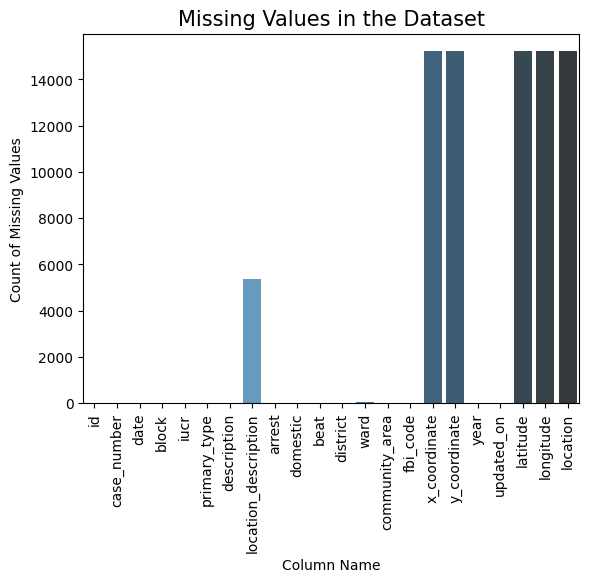

In [ ]:
x = missing_values_df['Column Name']
y = missing_values_df['Missing Values'].replace('No Missing Values', 0)

sns.barplot(x=x, y=y, palette="Blues_d")
plt.xticks(rotation=90)
plt.title("Missing Values in the Dataset", fontsize=15)
plt.ylabel("Count of Missing Values", fontsize=10)

plt.show()

**Missing Values Analysis:**

*Why is there data missing for this dataset in those columns?*

>Taking a look into the data and going on to inspect the features and details, these features show the highest amount of missing values that go on to connect to the geogrpahical location for the crime that had been committed and reported.

> I take into consideration that this dataset is based on the first hand accounts of individuals who were involved around or in the crime being recorded. Many reports may not go on to hold the information of where these crimes may have been committed and do not hold the specific information towards the location of the crime.

>Overall we have 80,446 missing values in the dataset the last time this code was loaded (expected to increase) which correlate towards location description, ward, community area, latitude, longitude, x-coordinate, y-coordinate, and location. Since these go on to not be direct numerical values, I had gone to comprehend that I do not need to use them to fill in the missing values. For this reason the values will be eliminated and taken away from this dataset.

In [ ]:
# This snippet will go on to drop those missing values and the non-null count will show the same amount for each column
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 955181 entries, 0 to 974464
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   id                    955181 non-null  int64         
 1   case_number           955181 non-null  object        
 2   date                  955181 non-null  datetime64[ns]
 3   block                 955181 non-null  object        
 4   iucr                  955181 non-null  object        
 5   primary_type          955181 non-null  object        
 6   description           955181 non-null  object        
 7   location_description  955181 non-null  object        
 8   arrest                955181 non-null  bool          
 9   domestic              955181 non-null  bool          
 10  beat                  955181 non-null  int64         
 11  district              955181 non-null  int64         
 12  ward                  955181 non-null  float64       
 13 

>As I had succesffuly dropped the missing values, this will result in a clean dataset with well defined features. This indeed can go on to remove a lot of information which can reduce the result accuracy. However, with 98.01 percent of the data being retained, there can be no other step towards working around the values that have been taken away.

In [ ]:
# Getting the continuous variables
cont = data._get_numeric_data().columns
print("The continuous variables are: ",list(cont))

The continuous variables are:  ['id', 'arrest', 'domestic', 'beat', 'district', 'ward', 'community_area', 'x_coordinate', 'y_coordinate', 'year', 'latitude', 'longitude']


In [ ]:
# Getting the categorical variables
print("The categorical variables are: ",list(set(data.columns) - set(cont)))

The categorical variables are:  ['description', 'case_number', 'primary_type', 'date', 'iucr', 'location', 'fbi_code', 'location_description', 'updated_on', 'block']


*Importance of Continuous Variables & Categorical Variables*:

>To be able to identify the continous and categorical is a crucial step towards analysis as well as preprocessing. These reasons are:


---


1. Technique selection:
>Continuous variables can take an infinite number of values between any two points and are typically analyzed using techniques that account for their nature such as regression analysis and correlation. Categorical variables go on to represent discrete categories or groups such as gender, type of crime, and more. Analyyzing the categorical variables often go on to involve frequency counts and other techniques for nominal and ordinal data.


---


2. Data Visualization:
>The choices between categorical and continuos affect the selection of techniques used for data visualization. Histograms, and scatter plots are more suited towards continuos data as bar charts are more suited for categorical data.


---


>Identifying these variables can be helpful for applying the correct analytical technique needing to be used throughout the project. It as well goes to ensure the integrity of the data analysis process moving forward.

# Eliminating Unecessary Columns:



In [ ]:
columns_to_remove = ['iucr', 'fbi_code', 'x_coordinate', 'y_coordinate', 'latitude', 'longitude', 'beat']
data = data.drop(columns=columns_to_remove)

data

,id,case_number,date,block,primary_type,description,location_description,arrest,domestic,district,ward,community_area,year,updated_on,location
0,12013828,JD191019,2020-01-01,044XX S LAVERGNE AVE,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,APARTMENT,False,False,8,22.0,56.0,2020,2020-03-28T15:41:01.000,"{'latitude': '41.81227369', 'longitude': '-87...."
1,12096663,JD286195,2020-01-01,045XX W MAYPOLE AVE,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,False,True,11,28.0,26.0,2020,2020-07-08T15:40:51.000,"{'latitude': '41.884528849', 'longitude': '-87..."
2,12122015,JD316293,2020-01-01,052XX S MAJOR AVE,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,8,14.0,56.0,2020,2020-08-05T15:40:46.000,"{'latitude': '41.79750276', 'longitude': '-87...."
3,12107086,JD298302,2020-01-01,071XX S MICHIGAN AVE,OFFENSE INVOLVING CHILDREN,CHILD PORNOGRAPHY,APARTMENT,False,True,3,6.0,69.0,2020,2020-07-18T15:40:52.000,"{'latitude': '41.76484639', 'longitude': '-87...."
4,12048400,JD229636,2020-01-01,013XX W 13TH ST,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,RESIDENCE,False,True,12,25.0,28.0,2020,2020-07-15T15:40:25.000,"{'latitude': '41.865187198', 'longitude': '-87..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
974460,13410524,JH202598,2024-03-22,049XX N MELVINA AVE,DECEPTIVE PRACTICE,ATTEMPT - FINANCIAL IDENTITY THEFT,RESIDENCE,False,False,16,45.0,11.0,2024,2024-03-29T15:40:51.000,"{'latitude': '41.971083022', 'longitude': '-87..."
974461,13406083,JH197260,2024-03-22,014XX W 16TH ST,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,12,25.0,31.0,2024,2024-03-29T15:40:51.000,"{'latitude': '41.859670217', 'longitude': '-87..."
974462,13409915,JH201802,2024-03-22,054XX N PARKSIDE AVE,DECEPTIVE PRACTICE,FORGERY,RESIDENCE,False,False,16,45.0,11.0,2024,2024-03-29T15:40:51.000,"{'latitude': '41.980150234', 'longitude': '-87..."
974463,13408222,JH199852,2024-03-22,052XX W ADDISON ST,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,16,31.0,15.0,2024,2024-03-29T15:40:51.000,"{'latitude': '41.945987476', 'longitude': '-87..."


>I went on to eliminate these columns as they do not go on to be benficial towards my analysis moving forward. The coordinates only go on to pinpoint the exact area in which the crime was committed and the fbi code as well with other columns do not parse as a primary factor towards looking at the overall city wide analysis.

# Statistical Analysis:

>For this portion of the project I went on to do a statistical analysis of the data after cleaning it and having a good overview of all the columns and the deinitions of what the data shows. For this I will take these steps in this portion which are:

1. Summary statistics
2. Distirubtion analysis
3. Outlier detection
4. Z-score analysis
5. Correlation analysis

>Doing these steps will provide me with the information needed to continue forward with working with the data and visualizing it later on.

# Step 1: Summary Statistics

In [ ]:
# Step 1: Summary Statistics
# I went on to calculate the summary statistics for the data
summary_statistics = data.describe()

print(summary_statistics)

                 id       district           ward  community_area  \
count  9.551810e+05  955181.000000  955181.000000   955181.000000   
mean   1.264296e+07      11.276573      23.107573       36.787367   
std    8.290815e+05       7.042673      13.957733       21.567963   
min    2.488900e+04       1.000000       1.000000        1.000000   
25%    1.230938e+07       5.000000      10.000000       23.000000   
50%    1.269212e+07      10.000000      24.000000       32.000000   
75%    1.305137e+07      17.000000      34.000000       54.000000   
max    1.341145e+07      31.000000      50.000000       77.000000   

                year  
count  955181.000000  
mean     2021.736233  
std         1.224060  
min      2020.000000  
25%      2021.000000  
50%      2022.000000  
75%      2023.000000  
max      2024.000000  


>Step one with the summary statistics provided me information on the columns I am looking at which are most relevant to the project with the mean, standard deviation, min, and max. This simply gives me a quick glimpse into what I am working with statstically

# Step 2: Distribution Analysis

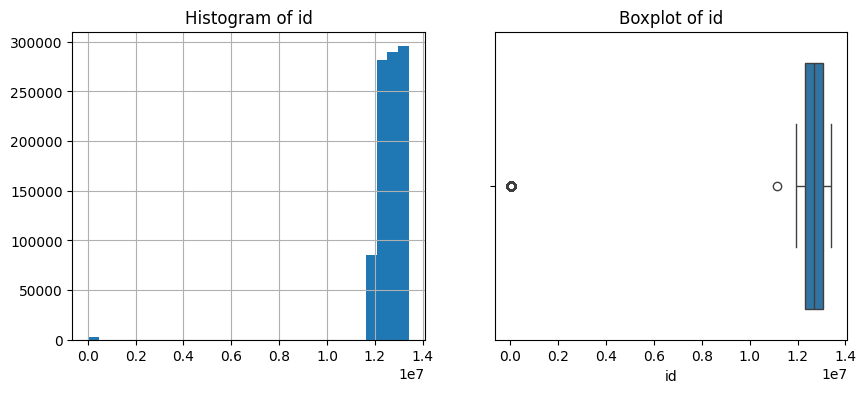

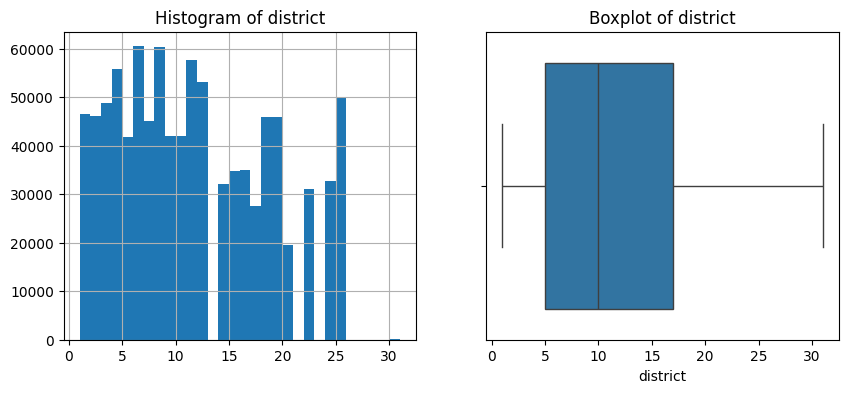

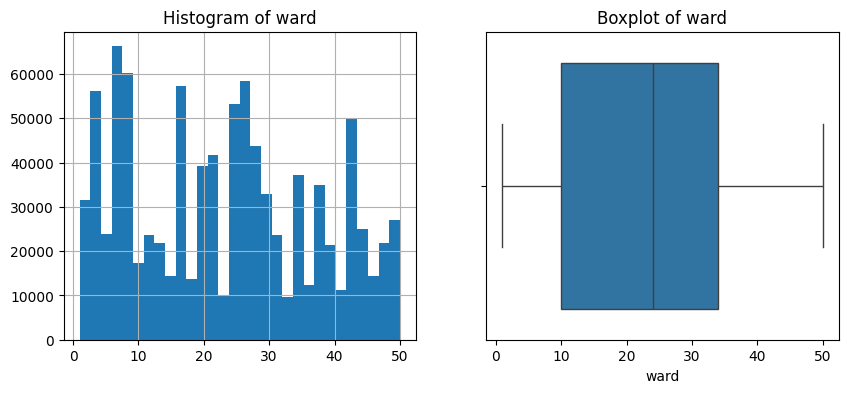

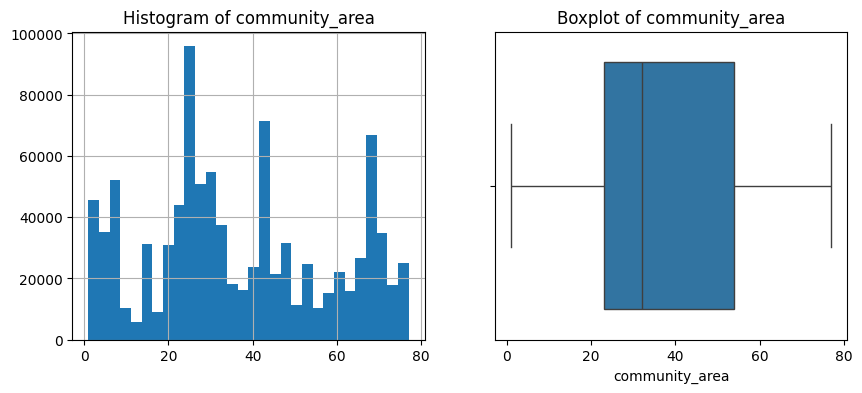

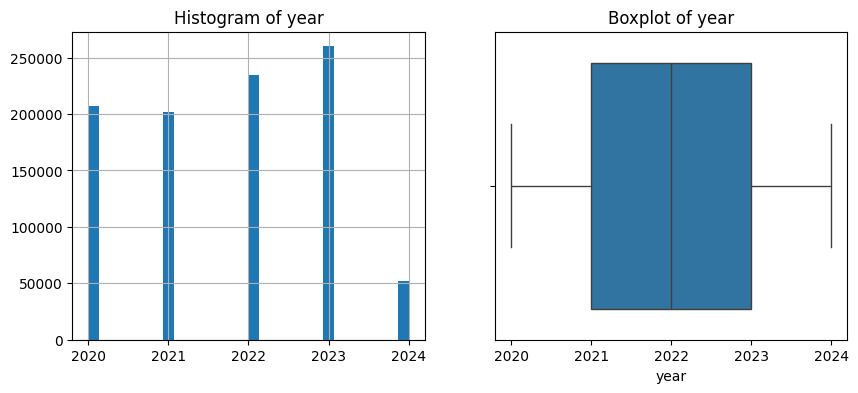

In [ ]:
# Step 2: Distribution Analysis
# for this part I will go on to plot boxplots and histograms looking at the data of the summary stats
for column in data.select_dtypes(include=np.number).columns:
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    data[column].hist(bins=30)
    plt.title(f'Histogram of {column}')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')

    plt.show()

For the distribution analysis I went on to look ath the wards, districts, id's, community area, and year including the z-score by year to place a visual on the statistical data and see if there is anything that may be found out of place and gain a good understanding of the data overall moving forward.

# Step 3: Outlier Detection

In [ ]:
# Step 3: Outlier Detection using IQR
Q1 = data['year'].quantile(0.25)
Q3 = data['year'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# This snippet in the code will go on to detect outliers for the data
outliers = data[(data['year'] < lower_bound) | (data['year'] > upper_bound)]
print("Outliers based on IQR:")
print(outliers)

Outliers based on IQR:
Empty DataFrame
Columns: [id, case_number, date, block, primary_type, description, location_description, arrest, domestic, district, ward, community_area, year, updated_on, location]
Index: []


# Step 4: Z-score Analysis

In [ ]:
# Step 4: Z-Score Analysis
data['year_z_score'] = (data['year'] - data['year'].mean()) / data['year'].std()

outliers_z_score = data[(data['year_z_score'] > 3) | (data['year_z_score'] < -3)]
print("Outliers based on Z-Score:")
print(outliers_z_score)

Outliers based on Z-Score:
Empty DataFrame
Columns: [id, case_number, date, block, primary_type, description, location_description, arrest, domestic, district, ward, community_area, year, updated_on, location, year_z_score]
Index: []


# Step 5: Correlation Analysis

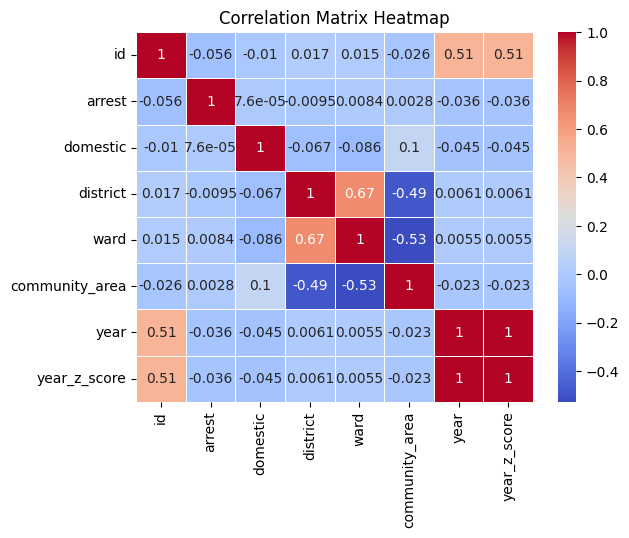

In [ ]:
# Step 6: Correlation Analysis
correlation_matrix = data.corr(numeric_only=True)

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

> This correlation matrix goes to provide and show me the pairwise correlation coefficients between the variables in the dataset that I am using. This goes to range from -1 to 1 with a value being close to 1 implying a strong positive correlation and -1 implying very little correlation.

# Date Analysis:

*Rationale for Date Analysis*

>Date and time are seen as being crucial and critical dimensions for crime analysis as they can go on to offer insights into when crimes are most likely to be committed and when they occur. This can revel temporal patterns and can be used to assess effectivess of law enforcement strategies over the time. With the analysis of this crime data, it can go on to help me identify the trends such as what seasons do they occur the most in, and anyu correlations with specific events or policy implementations.


---


 **Features:**

>Throughout the dataset, each crime is seen to be timestamped, which can go on to provide a precise record of when an event had occured. These timestamps can go on to include both the data and time of the crime, and it allows for a granular analysis down to the hour if it is really necessary. This date and time data can be used and disected into many compnenets such as year, month, day, and hour which serve as a seperate axis towards analysis.


---


*Analysis Methodology*



1.   When beginning to explore the data to be able to establish baselines and overall trends, I can go on to calculate the total number of crimes per period and then compare these figures ahead over time.
2.   Visualizing the data is also an important aspect as it can go on to employ various visuals with line graphs for time series analysis, heat maps to be able to display crime frequency, and calendar heat maps to be able to bserve different variations.
3. Seasonal analysis is important as statistical tests as well as models can be used to detect seasonality in the data.
4. Forecasting is the ability to implement time series forecasting models, such as ARIMA and LSTM neural networks to be able to predict future crime rates based on historical data.


---


>Overall the date and time analysis is seen as being a potent tool towards understanding the trends I see throughout this dataset. By being able to dissect patterns and predict trends, this can go on to evaluate the impact of differenct actions taken for public safety.




To begin with I firstly go on to identift the number of crimes per year from 2020-2024.

2020    206925
2021    202032
2022    234264
2023    259983
2024     51977
Name: year, dtype: int64


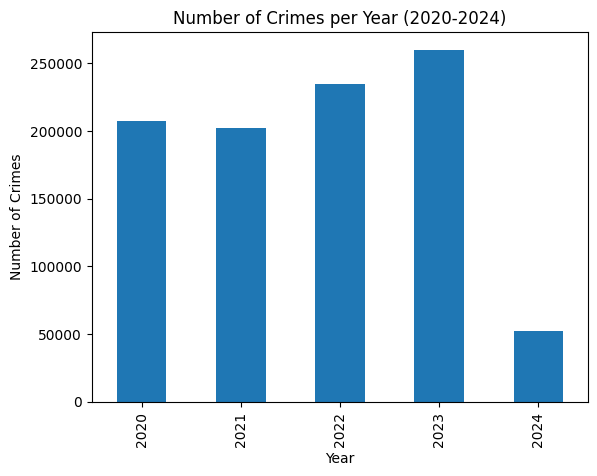

In [ ]:
# I go on to make a variable that will count the number of crimes per year
crime_counts = data['year'].value_counts().sort_index()
print(crime_counts)
# I then proceed to plot the results from the findings
crime_counts.plot(kind='bar')
plt.title('Number of Crimes per Year (2020-2024)')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.show()

>As we can see from the plot, the number of crimes have increased in the past couple of years. Taking a small dip in 2021, crime is seen to have increased moving forward, and already holding a bit of an effect early on in the year for 2024. Another way for plotting thisgraph will be below.

In [ ]:
data.set_index(pd.to_datetime(data['date']), inplace=True)
# for this code snippet, it is used to associate the date with the primary type of crime as well as the description
categorical_columns = ['primary_type', 'description', 'location_description']
data[categorical_columns] = data[categorical_columns].apply(lambda x: x.astype('category'))

primary_type_details = {
    'Total Categories': data['primary_type'].nunique(),
    'Categories Preview': data['primary_type'].cat.categories[:5]
}
# this last command will go on to show a description with the length, dtype, and categories of the primary type
print("Primary Type Details:")
for key, value in primary_type_details.items():
    print(f"{key}: {value}")

Primary Type Details:
Total Categories: 33
Categories Preview: Index(['ARSON', 'ASSAULT', 'BATTERY', 'BURGLARY',
       'CONCEALED CARRY LICENSE VIOLATION'],
      dtype='object')


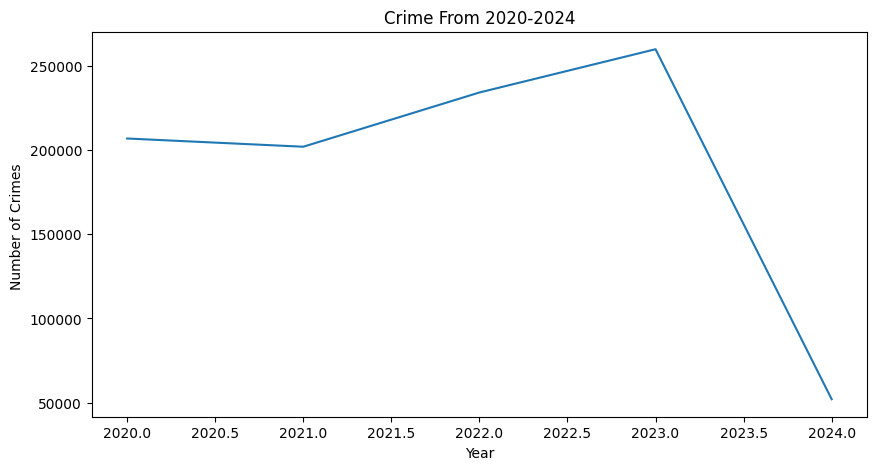

In [ ]:
plt.figure(figsize = (10,5))
data.groupby([data.index.year]).size().plot.line()
plt.title('Crime From 2020-2024')
plt.xlabel('Year')
plt.ylabel('Number of Crimes ')
plt.show()

>Looking at this line graph, we can go on to see that crime is seen to have increased ever since 2020. Now as there is a large dip in 2024, this is due to us being early on in the year, and that the data is not fully complete until we enter 2025 to come to the full conclusion if crime is still increasing or not.

>Moving forward I will now go on to look ath the number of crimes per month, day of the month, as well as the hour.

*Crime Per Month:*

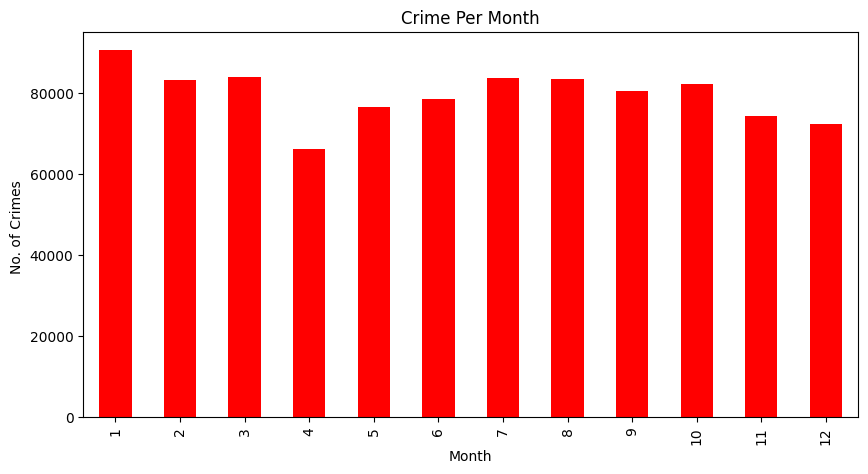

In [ ]:
plt.figure(figsize = (10,5))
data.groupby([data.index.month]).size().plot.bar(color = 'red')
plt.title('Crime Per Month')
plt.xlabel('Month')
plt.ylabel('No. of Crimes ')
plt.show()

*Crime Per Day of the Month:*

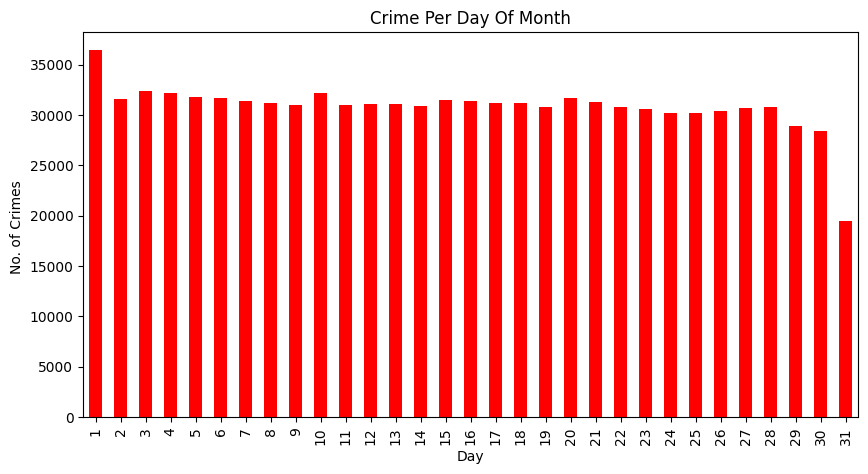

In [ ]:
plt.figure(figsize = (10,5))
data.groupby([data.index.day]).size().plot.bar(color = 'red')
plt.title('Crime Per Day Of Month')
plt.xlabel('Day')
plt.ylabel('No. of Crimes ')
plt.show()

*Crime Per Hour:*

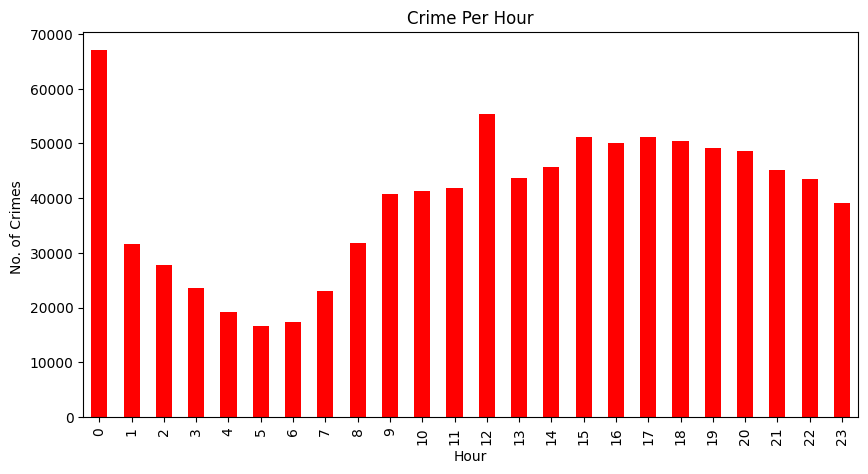

In [ ]:
plt.figure(figsize = (10,5))
data.groupby([data.index.hour]).size().plot.bar(color = 'red')
plt.title('Crime Per Hour')
plt.xlabel('Hour')
plt.ylabel('No. of Crimes ')
plt.show()

>After taking a look into the months, day, and hour. We can see that there are some trends that can be seen from what is being displayed in the grpahs.


---


*crimes per month*:


*   There is seen to be an increase in the beginning of the year, and then a decrease in the following months before it is summer. For this we start to see an increase on the fifth month of the year which is May, and around that time is when the weather becomes warmer. Can this lead to warm weather being a factor for more crimes being committed?
*   The ctimes then begin to decrease once more in the fall and following the end of the year where it begins to become colder. This can be a theory to settle that with warm weather, more people are out of their homes and more crimes are being committed in this aspect.


---


*crimes per day of the month*:


*   When it comes to the day of the month, It seems that there is a jump on the first day and then it holds steady throughout the entirey of the month. With this we can come to assumption that a crime is happening almost every single day for each month, and is held steady with only a slight jump on the first day, and a decrease on the last.


---

*crimes per hour*:


*   Lastly we have crime per the hour. The data shows that most crimes are seen to occur in the afternoon past 12 and in the late evening. One thing we notice is that crime is not seen to be committed as much early in the morning hours past 12 as it can lead to specualtion many people are not outside and are indoors asleep. We then see a steady increase past 5am and 6am leading to a spike at 12 and then a slow decrease down towards the evening and then the early morning once again.








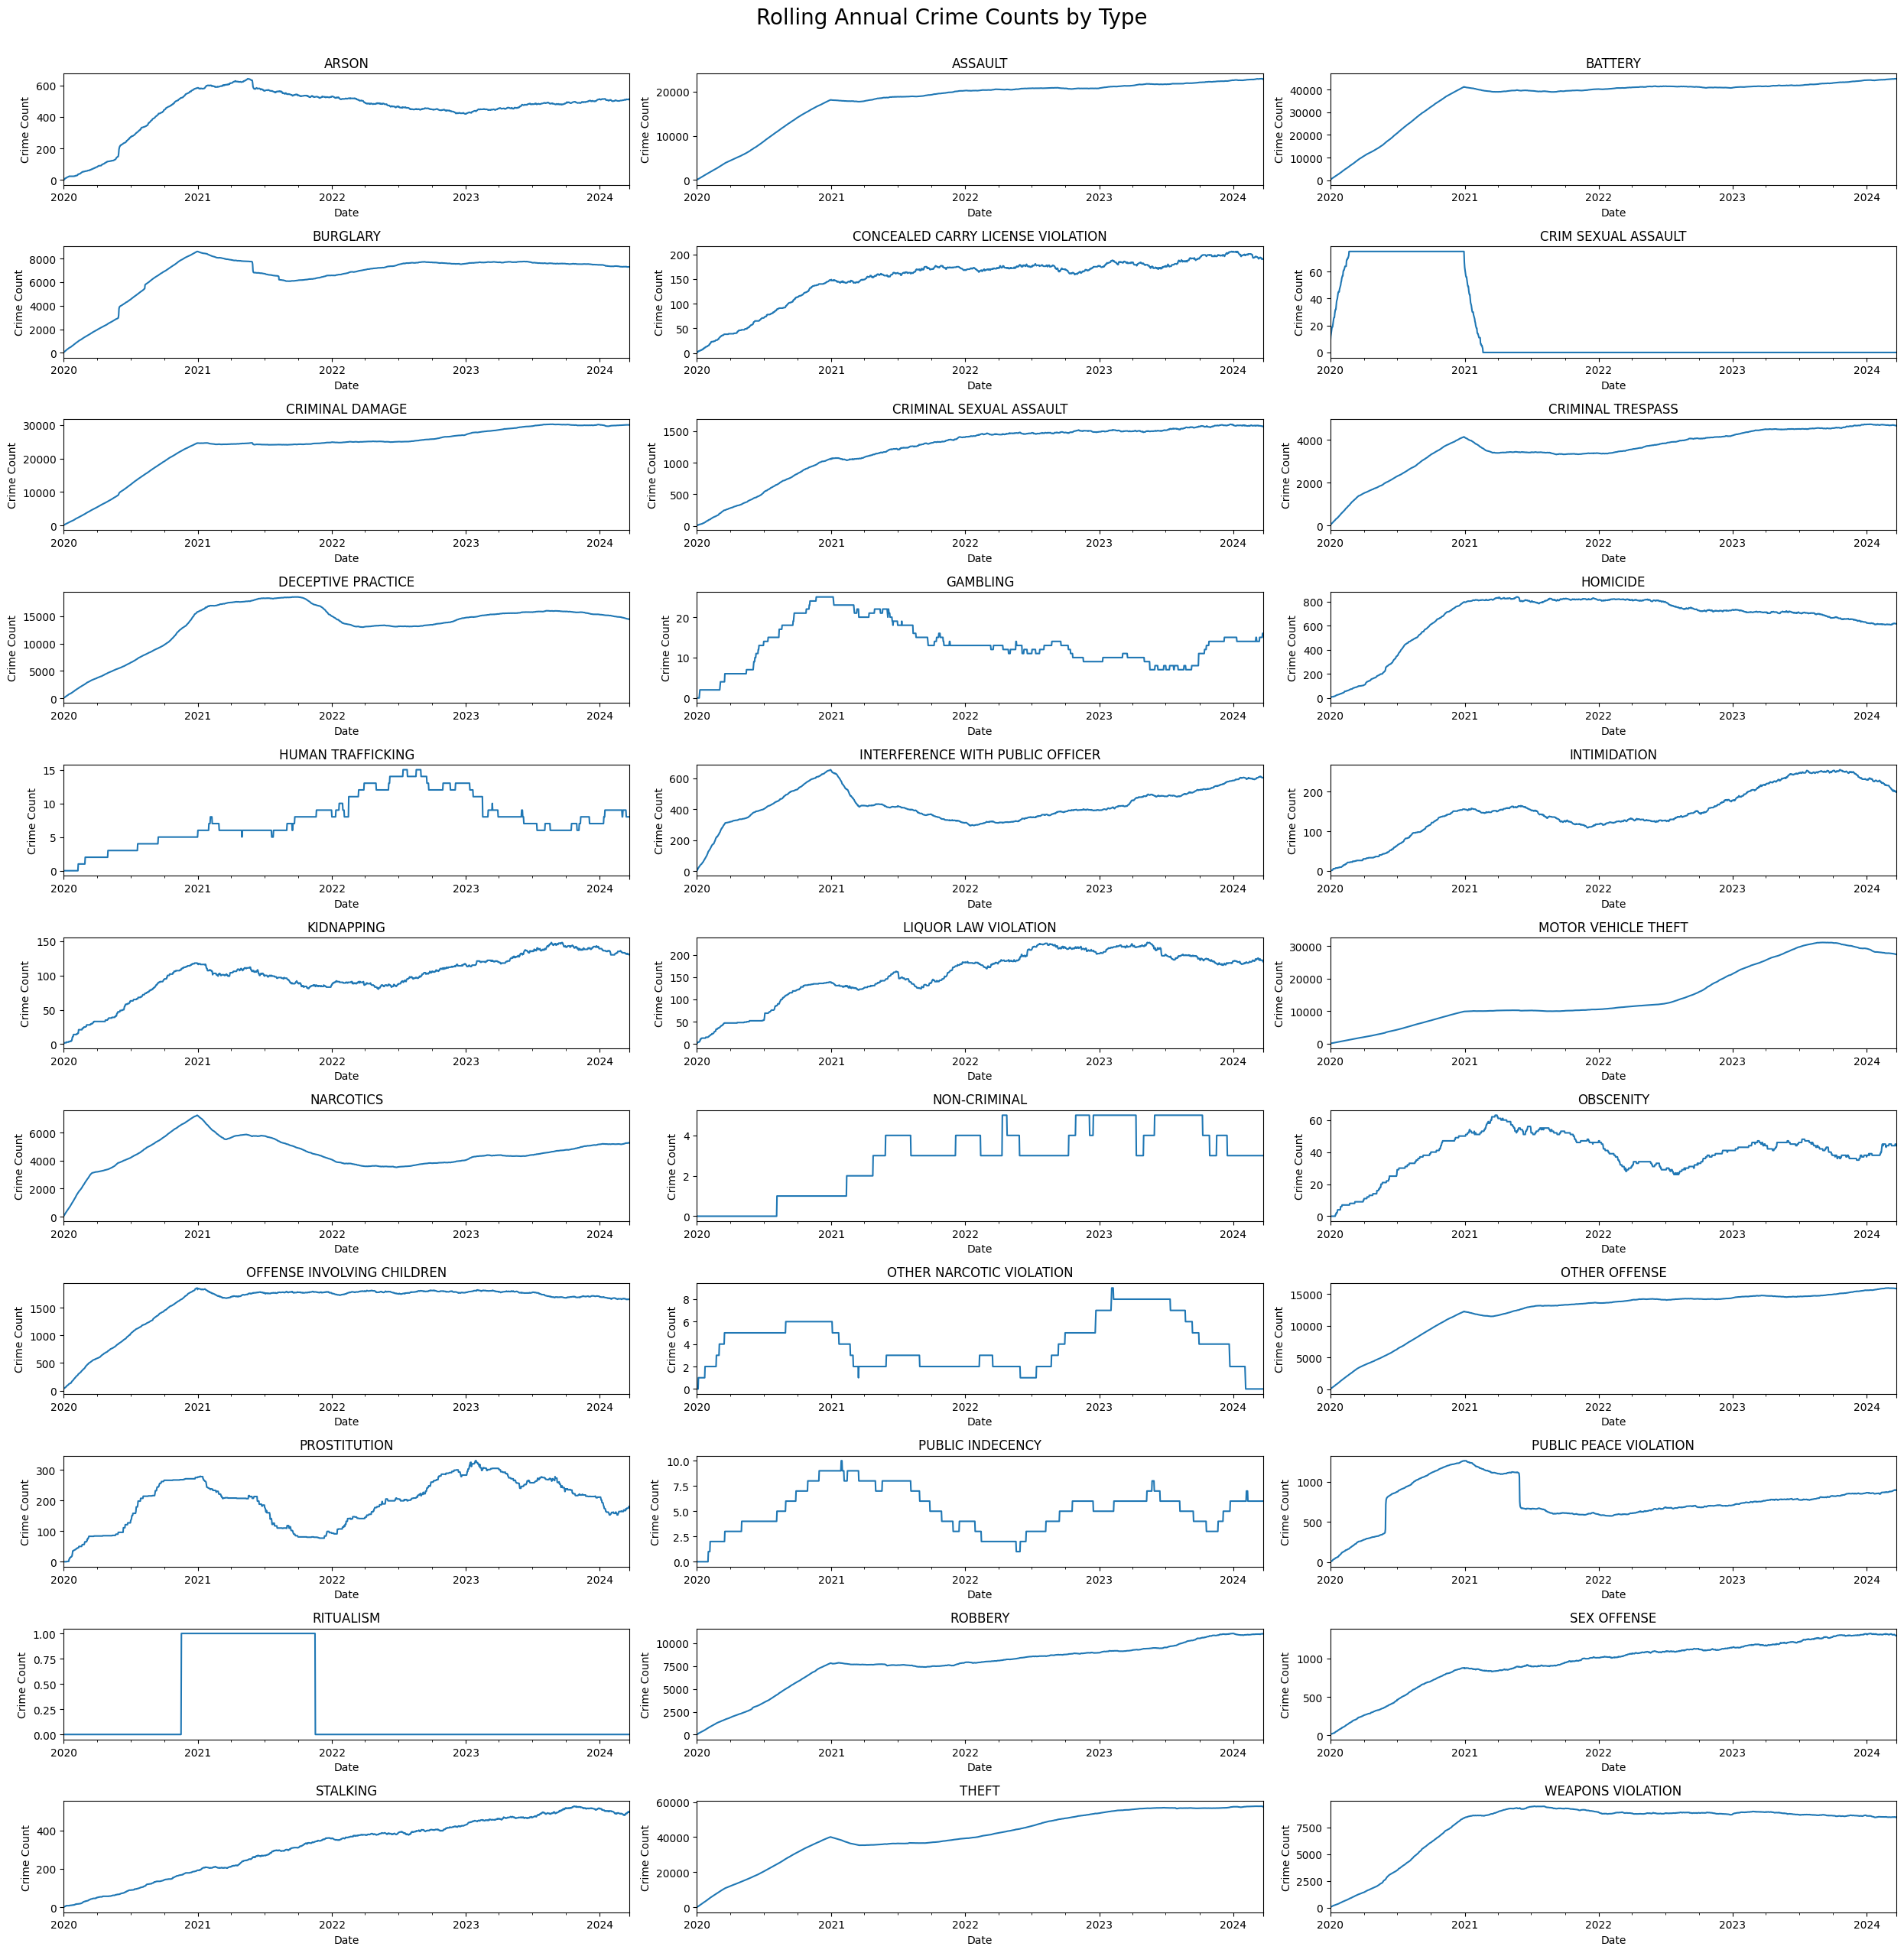

In [ ]:
daily_crime_counts = data.pivot_table(index=data.index.date,
                                      columns='primary_type',
                                      values='id',
                                      aggfunc='size',
                                      fill_value=0)

daily_crime_counts.index = pd.to_datetime(daily_crime_counts.index)
rolling_annual_counts = daily_crime_counts.rolling(window=365, min_periods=1).sum()

fig, axes = plt.subplots(nrows=int(np.ceil(rolling_annual_counts.shape[1] / 3)), ncols=3, figsize=(25, 25))
fig.subplots_adjust(hspace=0.5, wspace=0.5)  # Adjust space between plots

for i, column in enumerate(rolling_annual_counts.columns):
    ax = axes.flatten()[i]
    rolling_annual_counts[column].plot(ax=ax, title=column)
    ax.set_xlabel('Date')
    ax.set_ylabel('Crime Count')

plt.tight_layout()
plt.suptitle('Rolling Annual Crime Counts by Type', fontsize=20, y=1.02)

plt.show()

# Analyzing Common Crimes in the City of Chicago

>The Next step that I will go on to take is to analyze the common crimes the city and which ones are seen to be the most common to occur throughout 2020-2024.

>For this I will go on to take a look at the top five crimes in Chicago and come up with a conclusion.

<ipython-input-29-34a2e4b73a20>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')
<ipython-input-29-34a2e4b73a20>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


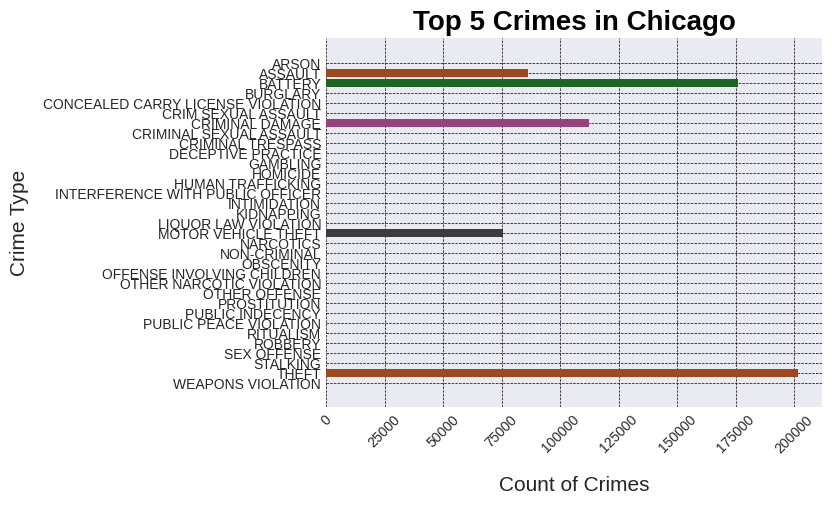

In [ ]:
plt.style.use('seaborn-darkgrid')

# Identifying the top 5 crimes by count directly, improving efficiency
top_5_crimes = data['primary_type'].value_counts().nlargest(5)

top_crimes_df = top_5_crimes.reset_index()
top_crimes_df.columns = ['Crime Type', 'Total Counts']

sns.barplot(
    y='Crime Type',
    x='Total Counts',
    data=top_crimes_df,
    palette="dark"
)

plt.title("Top 5 Crimes in Chicago", fontsize=20, color='#000000', fontweight='bold')
plt.xlabel("Count of Crimes", fontsize=15, labelpad=15)
plt.ylabel("Crime Type", fontsize=15, labelpad=10)
plt.xticks(rotation=45)  # Adjust rotation for a unique look
plt.grid(True, which='major', linestyle='--', linewidth='0.5', color='black')  # Add grid lines for better readability

plt.margins(y=0.1)
plt.show()

In [ ]:
top_crimes_df.columns = ['Crime', 'Number']

top_crimes_df.reset_index(drop=True, inplace=True)
top_crimes_df['Co-ordinates'] = range(1, 6)

print(top_crimes_df)

                 Crime  Number  Co-ordinates
0                THEFT  201767             1
1              BATTERY  175774             2
2      CRIMINAL DAMAGE  112452             3
3              ASSAULT   86453             4
4  MOTOR VEHICLE THEFT   75802             5


**Reults**:

>So looking into the top five occuring crimes from 2020-2024 we can see that Theft is the number one crime in the city, this can be listed as:


1. Theft
2. Battery
3. Criminal Damage
4. Assault
5. Motor Vehicle Theft

>With these crimes, we can see the number of times they have been committed in the city. And also can paint a picture through the previous visualizations on why these crimes may be committed at certain times throughout the day. However these crimes can change over time.


#**Mapping out the Data**:

>The next steps I want to take for this project is going to map out the data and be able to take a look into visualization the hotspots seen throughout the city of Chicago and potentially see where most crimes are being committed.


---


>For these steps I will want to go on to map the wards of the city, amd districts of the city. This will provide a geographical representation of the data and where the crimes are seen to be committed as well as help with the analysis as well as provide vieewers a better understanding of where the crimes are located throughout the city.


---


>Throughout this part of the project, I will use the folium library to be able to allow for an interactive map to be able to be displayed throughout this colab notebook. This is useful in displaying crime counts throughout different wards of the city as well as the districts.

In [ ]:
data.columns

Index(['id', 'case_number', 'date', 'block', 'primary_type', 'description',
       'location_description', 'arrest', 'domestic', 'district', 'ward',
       'community_area', 'year', 'updated_on', 'location', 'year_z_score'],
      dtype='object')

>I firstly want to take a look at the columns so that I can be able to view what I want to map out and also input the data correctly into my code snippets.

**WARDS:**

In [ ]:
import folium
from folium import Choropleth, GeoJson
from folium.features import GeoJsonTooltip
ward_geo_url = 'https://data.cityofchicago.org/api/geospatial/sp34-6z76?method=export&format=GeoJSON'
# I go on to filter the date of the data to match what I want to look at for the years 2020-2024
data['year'] = data['year'].astype(int)
#I then proceed to filter the data to match the years
filtered_data = data[(data['year'] >= 2020) & (data['year'] <= 2024)]
# I create a new variable for ward_data and then proceed to count the number of incidents
ward_data = pd.DataFrame(filtered_data['ward'].value_counts(ascending=True).astype(float))
ward_data.reset_index(inplace=True)
ward_data.columns = ['ward', 'crime_count']
# this is then the location for the map
chicago_location = [41.815117282, -87.669999562]
map_zoom_start = 11

crime_map = folium.Map(location=chicago_location, zoom_start=map_zoom_start)
# I then proceed to mapping the interactive map for users to look at and use
Choropleth(
    geo_data=ward_geo_url,
    name="choropleth",
    data=ward_data,
    columns=['ward', 'crime_count'],
    key_on='feature.properties.ward',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    highlight=True,
    legend_name='Number of incidents per police ward'
).add_to(crime_map)
# This part of the code allows for highlighted areas to be seen
style_function = lambda x: {'fillColor': '#ffffff', 'color': '#000000', 'fillOpacity': 0.1, 'weight': 0.1}
highlight_function = lambda x: {'fillColor': '#000000', 'color': '#000000', 'fillOpacity': 0.50, 'weight': 0.1}
tooltip = GeoJsonTooltip(
    fields=['ward'],
    aliases=["Ward Number: "],
    style="background-color: white; color: #333333; font-family: Arial; font-size: 12px; padding: 10px;"
)

GeoJson(
    ward_geo_url,
    style_function=style_function,
    control=False,
    highlight_function=highlight_function,
    tooltip=tooltip
).add_to(crime_map)

crime_map.keep_in_front(tooltip)
crime_map

Output hidden; open in https://colab.research.google.com to view.

>Looking at the mapping for the Ward, I have gone to prepare the data, these are the steps taken for the data preparation:


*   I went on to filter the data to include only the records for 2020-2024
*   ward_data is created from the filtered data to count the number of crimes in each ward and also ensure the counts are in a floating point format suitable for the chorpleth layering
* The ward_data dataframe is then reset to ensure that ward is a column and the columns are appropriately named for the mapping function and to be able to recognise the data


---


>The Choropleth layer class is used tio be able to add a chropleth layer to the map. This layer gets geometrical shapes for the ward and assigns color values to each ward based on the number of crimes being committed.


---


>The style function defines the default style fo non-highlighted wards while the highlight function changes the style when a ward is hovered over by a user which goes to make the map interactive.


---


*Interpretation*:



*   The resultant map provides a visual representation of crime distribution across the wards of the city with varying colors indicating crime density.
*   The tool overall allows stakeholders such as city planners and law enforcement to quickly be able to identify which wards have high crime rates and which have low crime rates.
* Policy makers also can go on to use this information to be able to allocate resources more effectively and plan intervention strategies to be able to track changes over time in response to the initiative.


---


>I will now go on to take a look at not just the wards but also the districts

**Districts:**

In [ ]:
district_geo = r'https://data.cityofchicago.org/api/geospatial/fthy-xz3r?method=export&format=GeoJSON'

filtered_data = data[(data['year'] >= 2020) & (data['year'] <= 2024)]

district_data = pd.DataFrame(filtered_data['district'].value_counts(ascending=True).astype(float))
district_data.reset_index(inplace=True)
district_data.columns = ['district', 'crime_count']

chicago_location = [41.815117282, -87.669999562]
map_zoom_start = 11

district_map = folium.Map(location=chicago_location, zoom_start=map_zoom_start)

Choropleth(
    geo_data=district_geo,
    data=district_data,
    columns=['district', 'crime_count'],
    key_on='feature.properties.dist_num',
    fill_color='BuPu',
    fill_opacity=0.7,
    line_opacity=0.2,
    highlight=True,
    legend_name='Number of incidents per police district'
).add_to(district_map)

style_function = lambda x: {'fillColor': '#ffffff', 'color': '#000000', 'fillOpacity': 0.1, 'weight': 0.1}
highlight_function = lambda x: {'fillColor': '#000000', 'color': '#000000', 'fillOpacity': 0.50, 'weight': 0.1}

tooltip = GeoJsonTooltip(
    fields=['dist_num', 'dist_label'],
    aliases=["District #: ", "District Label: "],
    style="background-color: white; color: #333333; font-family: Arial; font-size: 12px; padding: 10px;"
)

GeoJson(
    district_geo,
    style_function=style_function,
    highlight_function=highlight_function,
    tooltip=tooltip
).add_to(district_map)

district_map.keep_in_front(tooltip)
district_map

Output hidden; open in https://colab.research.google.com to view.

>As these maps are generated and analyzed, here are some concluding statements that can be made about the apatial distribution of crime throughout Chicago. These maps can go on to serve as powerful tools for data understanding and can go on to aid various individuals such as stakeholders and law enforcement for meaningful insight. Here are some concluding statements to help users understand the data:


---



1.   Spatial patterns:

>The maps go on to illustrate the spatial distribution of crime across the Chicago and allow users to identify areas with higher rates of crime. This can go on to inform residents and community leaders on which areas may require attention and resources to help decrease crime rates.


---


2.  Trend patterns:

>With filtering the data by years, this can go on to help users be able to observe trends over time within specific wards and districts. This helps towards understanding whether crime rates are increasing or decreasing over time. This is a crucial aspect towards evaluating the effectiveness of public safety measures as well as policies that are put into place.


---

3. Comparative Analysis:

>Users can go on to perform comparative analysis between different wards and districts with these mappings and be able to identify not only the areas with significant challenges but also those where crime rates are lower. Understanding what works in areas with lower crime rates can go on to be beneficial and help replicate successful strategies in higher crime rate areas.


---

>These maps are seen as an invaluable tool for a wide range of users as they not only go on to provide insights into current state of public safety across the city of Chicago, but also empower stakeholders and policy makers to take informed action towards creating a safer environment overall. Through this careful analysis and interpretation, users can contribute to more effective crime prevention strategies and improve public safety.

# Chances of Arrest Per Crime Type:

>The final and last step wanting to be taken throughout this project is looking at the chances of arrest per crime and the percentages. This is significant towards a public safety strategy as it goes to calculate the average chances of arrest per crime type. This projects and provides valuable insights overall towards law enforcement effectiveness as well as crime patterns with potential social issues within communities.

> I first go on to plot out the chances of arrest per crime type by producing a bar chart which shows the arrest rate, crime type, and percentage of arrests and if they were successful.

In [ ]:
import plotly.express as px

arrest_rate_by_type = data.groupby('primary_type')['arrest'].mean().reset_index()
arrest_rate_by_type['Arrest Rate'] = (arrest_rate_by_type['arrest'] * 100).round(2)
arrest_rate_by_type.sort_values(by='Arrest Rate', ascending=True, inplace=True)

fig = px.bar(
    arrest_rate_by_type,
    x='Arrest Rate',
    y='primary_type',
    color='Arrest Rate',
    text='Arrest Rate',
    orientation='h',
    height=800,
    width=1200,
    color_continuous_scale='thermal',
)

fig.update_traces(texttemplate='%{text}%', textposition='outside')
fig.update_layout(title_text='Arrest Rate per Crime Type')

fig.show()

> I then proceed towards calculating the average arrest rate per crime type and placing them in order as shown above in the bar chart as well as displaying the percentages and the number of what the crime type is listed as.

In [ ]:
arrest_rate_per_type = data.groupby('primary_type')['arrest'].apply(lambda x: x.mean())

arrest_rate_df = arrest_rate_per_type.reset_index(name='Average Arrest Rate')
arrest_rate_df = arrest_rate_df.sort_values(by='Average Arrest Rate', ascending=False)

print(arrest_rate_df)

                         primary_type  Average Arrest Rate
16               LIQUOR LAW VIOLATION             0.981481
24                       PROSTITUTION             0.976061
18                          NARCOTICS             0.970317
4   CONCEALED CARRY LICENSE VIOLATION             0.961644
10                           GAMBLING             0.953846
25                   PUBLIC INDECENCY             0.920000
13   INTERFERENCE WITH PUBLIC OFFICER             0.885577
20                          OBSCENITY             0.689474
32                  WEAPONS VIOLATION             0.615960
22           OTHER NARCOTIC VIOLATION             0.470588
26             PUBLIC PEACE VIOLATION             0.409028
11                           HOMICIDE             0.364052
8                   CRIMINAL TRESPASS             0.320224
19                       NON-CRIMINAL             0.230769
2                             BATTERY             0.153504
23                      OTHER OFFENSE             0.1439

**interpretation**:

>With this data there is much to interpret from looking at the successful arrests and what crime is associated with them:


---

1. Law Enforcement Effectiveness:

>These arrests and their percentages/rates go on to serve as indicators of law enforcement effectiveness towards a specific crime that has been committed. High arrest rates for certain crimes can go on to suggest strong law enforcement responses as well as deterence effect. As for the lower rates of arrests, they could indicate areas needing strategic focus. Of course many of these crimes may still be in investigation and the individual who has committed the crime may not be in custody, leading to this data to fluctuate depending on the effectiveness of investigation.


---

2. Policy impact:

>Arrest rate data can go on to be used by policy makers to be able to evaluate the effectiveness of current laws and policies on crime detterence and resolution. Insights from this analysis can imply revisions needing to be made in future terms. The creation of targeted crime prevention programs, and legislative changes by policy makers can aim in improving public safety and justice outcomes. With low rates of arrests on certain crimes, it can go on to highlight the need for legal reform and new approaches to be made.


---

>The analysis overall grants a crucial aspect of criminological study and offers insights into the effectiveness of law enforcement in Chicago. This can guide resources and inform policy decision making to support the effors of improving public safety in the city. For users this project aims towards the understanding of the dynamics and help in creating informed decisions with whoever the individual and their role may be.

# Concluding Statement:

> To conclude, this project goes to successfuly leverage data analytics and shed light on crime patterns and arrest probabilities across the different types of locations within the City of Chicago. By being able to analyze the data provided by the Chicago Data Portal, I was able to provide insights into law enforcement effectiveness, identify areas requiring strategic focus, and highlight the importance of legal reforms needing to be made based on crime types and arrest rates. This analysis goes to serve as a tool for policy makers and law enforcement personell to be able to engage in informed discussions about justice and public safety.

>The interactive visualizations grant users to be able to interact with the data that was established and analyzed and to be accessible plus understandable for a broad audience. These visual tools will facilitate a deeper understanding of crime dynamics in Chicago and foster a data-driven approach towards the prevention of future crimes.

> In the essence, this project stands as a testament towards the power of data and uncovering the multifaceted nature of ctime in Chicago. This as well creates a foundation for ongoing efforts to address and mitigate crime effectively towards similar urban environments across the globe.


# Milestone 4 Starting Point

>To continue with milestone 4, I will go on to continue with my milestone 3 data and include another dataset that will merge with this one. This will be able to analyze different things and obtain a better outlook and information in regards to crime in the city of Chicago.

>For this milestone I will go on to merge the data of Violence Reduction - Victims of Homicides and Non-Fatal shootings where the dataset goes to contain individual level homicide and non-fatal shooting incidents.

>With the data, it provides columns such as gunshot_injury_i which is to indicate whether the victimization involved a shooting, and for homicides, injury descriptions as well as zip codes, areas where those shootings had occured and other information are provided.

#Merging the data

>To begin with, I went on to go to the Chicago data portal to be able to obtain the API endpoint of the data, and work towards merging it with my current dataset that I am using from the previous milestone. This will be able to add more information and columns to the data to be able to make a more deeper analysis and obtain information about correlations taking place and what we can infer with the new data in hand

In [ ]:
import requests

response = requests.get("https://data.cityofchicago.org/resource/gumc-mgzr.json")
homicide_data = response.json()

homicide_df = pd.DataFrame(homicide_data)

crime_df = data.reset_index(drop=True)
homicide_df = homicide_df.reset_index(drop=True)

data['date'] = pd.to_datetime(data['date'])
homicide_df['date'] = pd.to_datetime(homicide_df['date'])

merged_df = pd.merge(crime_df, homicide_df, on='date', how='inner')

merged_df.head(10)

,id,case_number_x,date,block_x,primary_type,description,location_description_x,arrest,domestic,district_x,...,longitude,location_y,:@computed_region_d3ds_rm58,:@computed_region_vrxf_vc4k,:@computed_region_rpca_8um6,:@computed_region_43wa_7qmu,:@computed_region_d9mm_jgwp,homicide_victim_first_name,homicide_victim_mi,homicide_victim_last_name
0,13243729,JG463993,2023-10-15 00:45:00,051XX S HARPER AVE,THEFT,RETAIL THEFT,RESTAURANT,True,False,2,...,-87.668014654,"{'type': 'Point', 'coordinates': [-87.66801465...",121,33,43,26,15,KOBE,NaN,PUGA
1,13243687,JG464032,2023-10-15 01:12:00,057XX S MORGAN ST,THEFT,$500 AND UNDER,STREET,True,False,7,...,-87.584638547,"{'type': 'Point', 'coordinates': [-87.58463854...",246,44,25,35,19,NaN,NaN,NaN
2,13243740,JG464010,2023-10-15 01:12:00,016XX E 92ND ST,BATTERY,AGGRAVATED - HANDGUN,STREET,False,False,4,...,-87.584638547,"{'type': 'Point', 'coordinates': [-87.58463854...",246,44,25,35,19,NaN,NaN,NaN
3,13245714,JG466124,2023-10-15 02:30:00,013XX S LAKE SHORE DR NB,CRIMINAL DAMAGE,TO PROPERTY,SIDEWALK,False,False,1,...,-87.661464654,"{'type': 'Point', 'coordinates': [-87.66146465...",136,29,44,23,15,SALVADOR,NaN,HERRERA
4,13244739,JG464444,2023-10-15 02:30:00,005XX N HALSTED ST,ROBBERY,ARMED - HANDGUN,STREET,False,False,12,...,-87.661464654,"{'type': 'Point', 'coordinates': [-87.66146465...",136,29,44,23,15,SALVADOR,NaN,HERRERA
5,13245503,JG465711,2023-10-15 02:30:00,061XX N KILBOURN AVE,THEFT,OVER $500,STREET,False,False,17,...,-87.661464654,"{'type': 'Point', 'coordinates': [-87.66146465...",136,29,44,23,15,SALVADOR,NaN,HERRERA
6,13244163,JG464683,2023-10-15 02:30:00,013XX W PRATT BLVD,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,24,...,-87.661464654,"{'type': 'Point', 'coordinates': [-87.66146465...",136,29,44,23,15,SALVADOR,NaN,HERRERA
7,13244302,JG464895,2023-10-15 06:00:00,0000X E 26TH ST,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1,...,-87.801449059,"{'type': 'Point', 'coordinates': [-87.80144905...",196,26,3,7,6,NaN,NaN,NaN
8,13243954,JG464396,2023-10-15 06:00:00,020XX W WABANSIA AVE,CRIMINAL TRESPASS,TO LAND,RESIDENCE - YARD (FRONT / BACK),False,False,14,...,-87.801449059,"{'type': 'Point', 'coordinates': [-87.80144905...",196,26,3,7,6,NaN,NaN,NaN
9,13244151,JG464594,2023-10-15 06:00:00,004XX N STATE ST,ASSAULT,SIMPLE,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,18,...,-87.801449059,"{'type': 'Point', 'coordinates': [-87.80144905...",196,26,3,7,6,NaN,NaN,NaN


# Dropping uneccesary columns

>As I had loaded the data, I noticed that there were a lot of columns that I did not need. I proceeded to drop the columns that I found unnecessary with moving forward in the project and for this Milestone.

In [ ]:
columns_to_drop = ['location_y', ':@computed_region_d3ds_rm58',
                   ':@computed_region_vrxf_vc4k', ':@computed_region_rpca_8um6',
                   ':@computed_region_43wa_7qmu', ':@computed_region_d9mm_jgwp',
                   'homicide_victim_first_name', 'homicide_victim_last_name',
                   'location_description_y', 'state_house_district', 'state_senate_district',
                   'victimization_fbi_cd', 'incident_fbi_cd', 'victimization_fbi_descr',
                   'incident_fbi_descr', 'victimization_iucr_cd', 'incident_iucr_cd',
                   'victimization_iucr_secondary', 'incident_iucr_secondary',
                   'street_outreach_organization']

merged_df = merged_df.drop(columns=columns_to_drop)

In [ ]:
merged_df.columns

Index(['id', 'case_number_x', 'date', 'block_x', 'primary_type', 'description',
       'location_description_x', 'arrest', 'domestic', 'district_x', 'ward_x',
       'community_area_x', 'year', 'updated_on', 'location_x', 'year_z_score',
       'case_number_y', 'block_y', 'victimization_primary', 'incident_primary',
       'gunshot_injury_i', 'unique_id', 'zip_code', 'ward_y',
       'community_area_y', 'area', 'district_y', 'beat', 'age', 'sex', 'race',
       'month', 'day_of_week', 'hour', 'updated', 'latitude', 'longitude',
       'homicide_victim_mi'],
      dtype='object')

# Small Data Analysis

>After being able to take away the columns that were not needed in my analysis moving forward I proceeded to continue with my analysis overall with the merged dataframe.

>This dataset I had merged with my original data provides me with the age of victims realted to shooting crime in Chicago, this allows me to look into the age distribution of the victims, their sex, and also the location description of where the crime was committed.

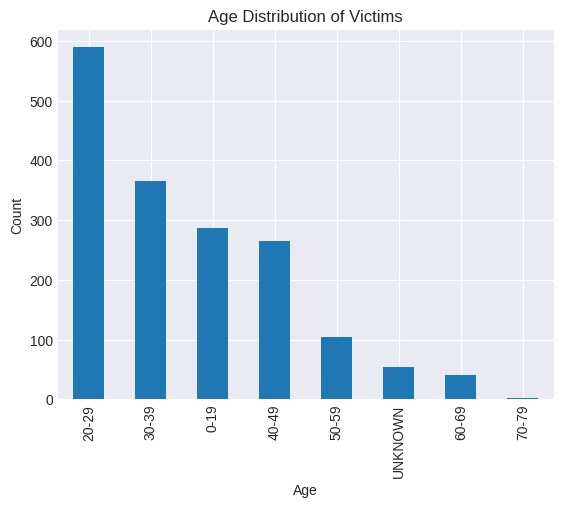

In [ ]:
age_distribution = merged_df['age'].value_counts()
gender_distribution = merged_df['sex'].value_counts()
location_distribution = merged_df['location_description_x'].value_counts()

age_distribution.plot(kind='bar')
plt.title('Age Distribution of Victims')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

>From what we can see, we can see that a large majority of those victims are between the ages of 20 and 29. This goes to show that many of the victims related to victimizations are a young group of individuals and it continues to shorten as the age increases.

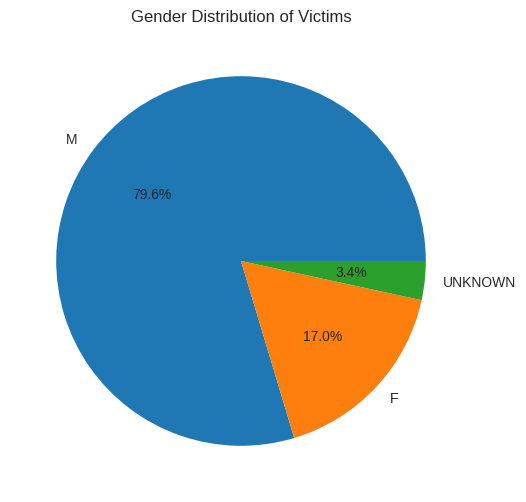

In [ ]:
gender_counts = merged_df['sex'].value_counts()
gender_percentages = gender_counts / gender_counts.sum() * 100

plt.figure(figsize=(8, 6))
gender_percentages.plot(kind='pie', autopct='%1.1f%%')
plt.title('Gender Distribution of Victims')
plt.ylabel('')  # Hides the 'gender' label on the y-axis
plt.show()

Here is a Pie chart that shows the percentage differential between males, females, and unkown to the gneder distribution of victims.

>I then continued to look at the overall dataset with ctimes involving incident counts throughout the city of Chicago. This part will go on to look at different zip codes in the city limits to be able to distribute which areas are most impacted and the number of incidents that had occured in those areas.

In [ ]:
location_counts = merged_df.groupby('zip_code').size().reset_index(name='incident_count')
location_counts_sorted = location_counts.sort_values('incident_count', ascending=False)

top_locations = location_counts_sorted.head(10)
print(top_locations)

   zip_code  incident_count
22    60628             106
18    60623             105
15    60620             103
4     60609             100
35    60644              99
29    60637              87
7     60612              87
12    60617              85
19    60624              85
38    60649              79


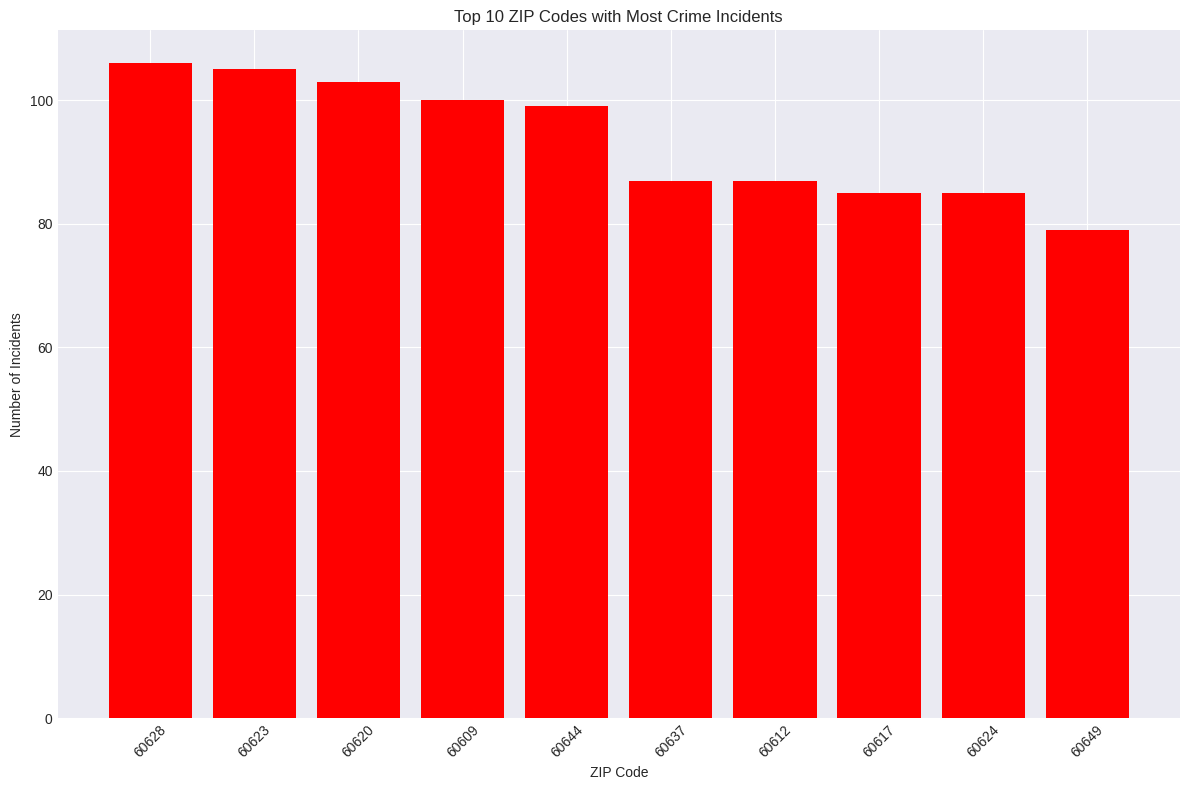

In [ ]:
location_counts = merged_df.groupby('zip_code').size().reset_index(name='incident_count')
location_counts_sorted = location_counts.sort_values('incident_count', ascending=False)
top_locations = location_counts_sorted.head(10)

plt.figure(figsize=(12, 8))
plt.bar(top_locations['zip_code'].astype(str), top_locations['incident_count'], color='red')
plt.title('Top 10 ZIP Codes with Most Crime Incidents')
plt.xlabel('ZIP Code')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
chicago_map = folium.Map(location=[41.8781, -87.6298], zoom_start=11)

for idx, row in merged_df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=3,
        color='red',
        fill=True,
        fill_color='red'
    ).add_to(chicago_map)

chicago_map.save("Chicago_Crime_Map.html")
chicago_map

>After viewing all the zip-codes and the areas that are most effected, I lastly went to plot those points on the Chicago area map where the victimizations of homicides, and shooting are more prominent. These red points go on to mark the areas in which the victims are most effected as well as where the incidents had occured. AS we can see going more north of the city there is a small decrease in the red dots appearance as in comparison to the south side of the city it is seen to be more prominent. This can lead to an analysis and connection between crimes and correlate to more crime numbers throughout the city in relation to gunshot violence occur in the southern portion of Chicago.

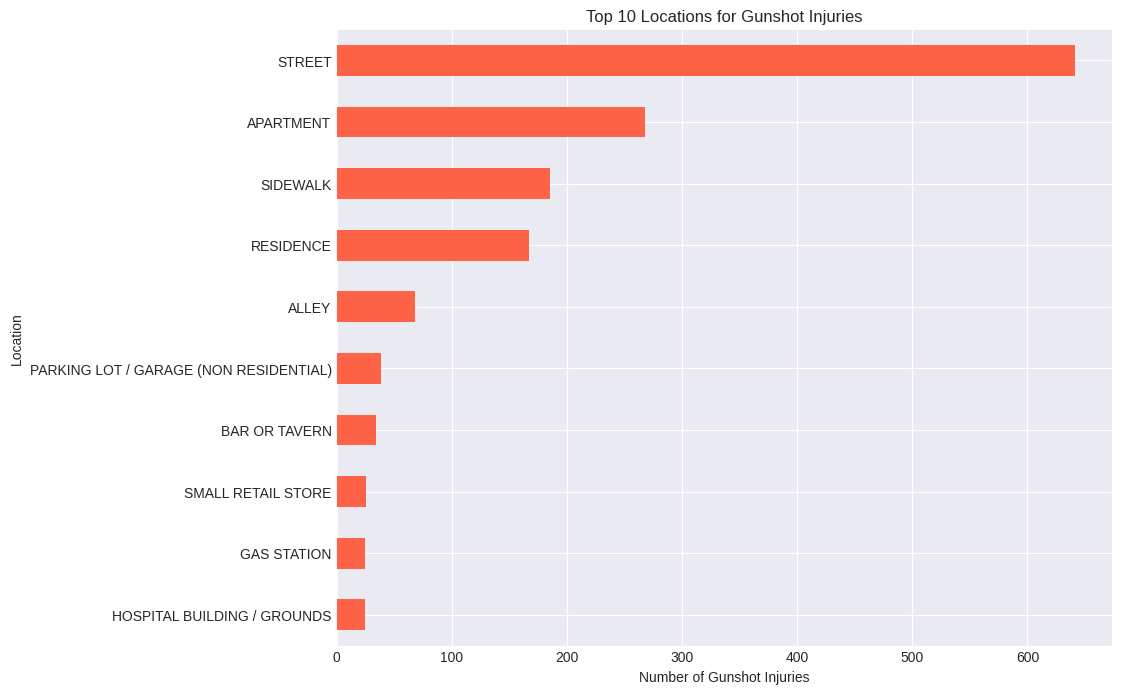

In [ ]:
gunshot_injury_data = merged_df[merged_df['gunshot_injury_i'] == 'Y']
gunshot_injury_counts = merged_df['location_description_x'].value_counts().head(10)

plt.figure(figsize=(10, 8))
gunshot_injury_counts.plot(kind='barh', color='tomato')

plt.gca().invert_yaxis()

plt.xlabel('Number of Gunshot Injuries')
plt.ylabel('Location')
plt.title('Top 10 Locations for Gunshot Injuries')

plt.show()

> After further analyzing the pin poin locations, I wanted to take a look at the gunshot injuries and victimizations and where they correlate with the locations in hand. We can see thatmany of these crimes realted to gunshots and shootings are conducted on streets for the majority.

>this can lead to speculations of confrontations happening outside, or drive-bys that occur nearby. Other areas can also be considered for robberires and attempted thefts as we see apartments and residences on this chart. Much of which can lead to speculations of home invasion attempts, or self-defence.

>There are many speculations that can be made in regards to the victims of gunshot and shooting crime. Many of which can hold different reasons. For the most part in the overall speculation, many gunshot crimes are conducted in the streets of Chicago.

# Conclusion

>To conclude this aspect of milestone 4, We can see that the merged dataset goes to give us moer information of crimes related to city wide gun violence and more columns that give information on areas, sex, race, and age. This gives the opportunity to look further into the analysis of victims of gun violence and in areas to where those crimes are happening the most.

>With this dataset merged with the milestone 3 data, we can look into the crimes overall trhough the city and continue building more material with deeper questions being asked as to how to resolve crime in Chicago and what actions can be taken

>With the necessary tools and questions, this project can aim to reduce all sorts of crime as well as be a useful resource for law enforcement, public individuals, and researchers who are studying crime analytics and how the city of Chicago can protray a perfect example of diverese crimes being done in areas spread throughout the city. Many statistical inferences can also be conducted to gain percentages of effectiveness, outcomes, and more to be able to truly understand if crime is predicted to increase or decrease.

# Milestone 5: Story & Summary of the Chicago Crime Analysis Project


---

***Introduction:***

This project focusing on Chicago crime was undertaken with a vision to harness the power of data as well as understand/mitigate the crime that is taking place in Chicago. The dataset that I have used is sourced from the City of Chicago's open data portal, and spans from 2001 to the present. I have gone to choose to look at an analyze the current crime distribution from 2020 until the present day. This provides a rich tapestry of information about the various incidents of crime across the city. This project was driven by curiousity to explore the nuances of urban crime, how it varies over time and across different locations, and the potential to inform better public safety strategies through data insights. Throughout many years, people have always heard of Chicago being a crime riddled city, and for this project, my curiosity has taken place to explore it in more depth.


***Attraction to the Dataset:***

The decision to use this dataset was purely motivated by it comprehensiveness and accessibility, allowing me to endure a deep dive into crime analysis with data support. The dataset's range of crime types, ranging from theft to assault, and detailed attributes such as time and location as well as the outcome of the crime with an arrest being made or not, provided a good ground for comprehensive spatial and temporal analyses. With all the attributes provided in the dataset and such information, it made me wonder if it is possible to make better use of it by uncovering patterns that are more relevant to the city's needs.

***Expectations & Initial Insights:***

Diving into this analysis, I went on to expect distinct temporal and geographical trends, such as increases in certain types of crimes duringspecific times of the year or through particular districs. Another hypothesis that was made was that the analysis would reveal significant correlations between crime rates and specific timess or locations, potentially linked to the socio-economic factors, though these were not directly analyzed in this project due to the limitations. However, the findings and insights that were made can paint a clear and straighforward relations to where most crimes take place and in regards to the different types of crime.


---


***Key Findings:***

Some key insights that were found throughout this analysis were:

1. **Crime trends over time:**

The data revealed an uptick in crime rates in recent years, with seasonal spikes that suggest a correlation between crime rates and certain times of the year.

2. ***Geograpgical distribution:***

Mapping the data showed higher crime densities in specific wards and districts, highlighting areas with heightened public safety needs. This is likely due to the increased crime rates that are being reported in these areas.

3. ***Crime type analysis:***

Certain crimes, like theft and robbery, were more prevalent, comprising a significant portion of the total crime reported in the dataset. However, with the rates of those crimee, it leads a majority to be reported in the city of Chicago, however, it does not lead to a high arrest rate.

4. ***Effectiveness of law enforcement:***

The analysis of arrest rates by crime type provided an indicator of law enforecement effectiveness, with higher arrest rates for narcotics violations and lower rates for more serious crimes like assault and robbery.


---

***Explanation of Findings:***

The findings from this project can be explained through various urban sociological theories that suggest crime is often higher in areas with socio-economic challenges. Seasonal variations might be influenced by factors such as weather, with warmer months leading to more outdoor activity and consequently, mnore opportunities for crimes to occur. The disparities in arrest rates by vrime type could be reflective of law-enforcement focus and resource allocation as well. Additionally, the spatial and temporal trends that were found in the dataset could be used to inform public safety strategies. While looking at the data however, many different crimes and the type of crime committed can have a large impact in different areas, such as motor vehicle theft being very present in the downtown areas of the city.

***Challenges:***

A significant challenge was dealing with missing data, particularly in geogrpahic information, which required careful handling to mainting the integrity of the analysis. Aditionally the vastness of the dataset had gone to pose a challenege in processing and analyzing the data as well as necessitating the use of different tools and handling techniques.


---


***If I had More Time:***

If I had more time to work on this project and if this truly was something I woud carry out for a year long project with deeper insights, these would be some of the key analysis and findings that I would make.

1. **Predictive Modeling:**

Developing predictive models to forecast crime rates based on historical data and other predictors could be highly beneficial for proactive public safety planning. This would incorporate more data and provide more insights into the future. Machine learning techniques such as regression and classification could be used to predict future crime rates as well, with more data and better accuracy.

2. **Community Engagement:**

For a project such as this, it is important to get deeper insight to those who are working towards reducing crime in the City of Chicago. Engaging with community leaders and residents could provide qualitative insights to complement the quantitative data analysis, leading to more community informed approaches to public safety. As well as communicating with political figures, it would be helpful to engage with elected officials and representatives to help inform public policies as well as gain insight towards the techniques and priorities established to combat crime.


---


***Conclusion:***

This project underscores the value of data analytics in understanding complex urban issues like crime. By revealing patterns and trends in crime across Chicago, the project provides a foundation for informed public safety strategies and contributes to the broader discourse on urban safety and management. With being a resident living in Chicago, it is important to understand the implications of data analytics in public safety and with this project I hope to expand into a deeper insight and outlook of what crimes are being committed. This as well surfacces for opportunities to not only look at chicago but as well as other major cities and provide comparison of crime rates nationally and across different states. The insights gained not only aid in immediate policy making and law enforcement efforts but also open avenues for future research and community engagement to collaboatively address the challenges posed by urban crime.

#Reflection

Throughout the Chicago Crime Analysis project, I have gone to develop an range of data analysis techniques that were crucial to the successful completion of my prject. These techniques included data manipulation using pandas, advanced data visualization with seaborn and folium, statistical analysis, and the application of some machine learning techniques. This project has also allowed me to hone my skills in API usage for data aquisition, handling large datasets efficiently and cleaning and preprocessing the data to enusre accuracy in the analysis.

***Code Quality:***

Reviewing the code I have written for this project, I beleive it reflects a high standard of clarity and organization. Each block of code that I have written was annotated with comments to the best of my ability to explain the purpose and functionality. This ensures that even someone without a deep background in programming and coding, can follow the logic and intentions behind each analysis step. It as well an be used as notes for future projects and if I want to go back to take a look at how something was done and how it operates. I also went on to utilize functions to avoid redundanct as well as maintain readability and scalability.

If I were a manager that was reviewing this code, I would judge it to be clean and professionaly presented, but also useful to where it provides accurate details and functions so that when the code runs, it prompts an accurate response. I would say it adheres to common standards and practices which would make it easy for another developer and someone working on a project similar to pick up and extend it if necessary.

***Technical Documentation:***

throughout this project the technical documentation throughout the colab notebook was planned on being detailed and informative. It not only is meant to go on and describe what the code is doing but also why certain decisions were made, such as the choise to drop missing values or the rationale begind using specific types of plots for data visualization.

Presenting this documentation to someone experienced in data mining would leave a positive impression in my opinion, as it goes to showcase a thorough understanding of both the technical and analytical aspects of the project. The documentation also effectively bridges the gap between raw data processing and strategic insights, which is crucial in data science and data mining.

***Reflection:***

reflecting on the scope of the work completed over the duration of the project, I feel that it aligns with the expectations of this course. This project had gone to cover multiple facets of data analysis from data exploration to cleaning and statistical analysis.

I had gone to put many hours and effort into writing and organizing the code to the best of my ability as this is a project I want to use to showcase my skills and place on my resume for achieving a career driven goal. Each milestone in this project built on the previous one and created a comprehensive analysis that not only answered initial questions but explored new code snippets and queries that arose from ongoing findings.

This project overall stands as a overview  to the application of data science and how it connects to public safety with the ptential implications for policy making and planning. The skills and techniques that I have used and refined through this porcess are also seen as invaluable and applicable to professional roles in the data science community.